# Import Dataset

In [3]:
import pandas as pd
A = pd.read_csv("C:/Users/Baccchi/Downloads/airpassenger.csv")

In [4]:
A.head()

,1949-01,112
0,1949-02,118
1,1949-03,132
2,1949-04,129
3,1949-05,121
4,1949-06,135


In [6]:
#to give column names
A.columns = ['year','passengers']

In [7]:
A.head()

,year,passengers
0,1949-02,118
1,1949-03,132
2,1949-04,129
3,1949-05,121
4,1949-06,135


In [8]:
#to convert into correct data format
A.year=pd.to_datetime(A.year,format="%Y-%m")

In [9]:
A.index=A.year#time should not be a specific column,it should be an index

In [10]:
A=A.drop(labels="year",axis=1)

In [11]:
A

,passengers
year,
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# Visualise Original Time-Series

In [12]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'No. of Passengers')

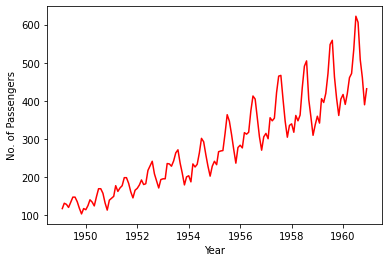

In [13]:
#Visualise the airpassenger dataset
plt.plot(A,c='red')
plt.xlabel('Year')
plt.ylabel('No. of Passengers')

Air passengers data from 1949 to 1961 show significant upward growth of passengers.

# To visualise the components of time-series

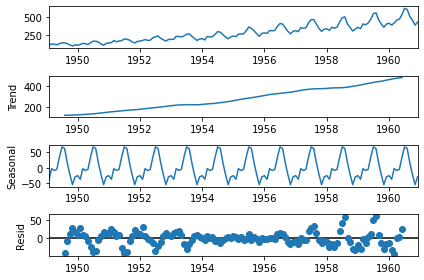

In [15]:
from statsmodels.api import tsa
tsa.seasonal_decompose(A).plot()
plt.show()

# Standardization of Time-Series

In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit_transform(A[['passengers']])

array([[-1.37222053],
       [-1.25470393],
       [-1.27988606],
       [-1.3470384 ],
       [-1.2295218 ],
       [-1.12039925],
       [-1.12039925],
       [-1.22112776],
       [-1.36382649],
       [-1.48973713],
       [-1.37222053],
       [-1.39740266],
       [-1.30506819],
       [-1.17915755],
       [-1.2295218 ],
       [-1.31346223],
       [-1.11200521],
       [-0.93573031],
       [-0.93573031],
       [-1.03645882],
       [-1.24630989],
       [-1.4057967 ],
       [-1.18755159],
       [-1.14558138],
       [-1.10361116],
       [-0.86857797],
       [-0.99448861],
       [-0.91894222],
       [-0.86857797],
       [-0.69230307],
       [-0.69230307],
       [-0.81821371],
       [-1.00288265],
       [-1.13718733],
       [-0.96930648],
       [-0.92733627],
       [-0.85178988],
       [-0.74266733],
       [-0.84339584],
       [-0.82660776],
       [-0.53281626],
       [-0.43208775],
       [-0.33135924],
       [-0.60836265],
       [-0.75945541],
       [-0

In [27]:
A[["passengers"]].mean()

passengers    281.475524
dtype: float64

# Rolling Mean

In [29]:
import numpy as np
log_pass = np.log(A[["passengers"]])
rm = log_pass.rolling(window=12).mean()
A['diff']=log_pass-rm

In [30]:
B = A[A['diff'].isnull()==False]

In [31]:
B.head()

,passengers,diff
year,,
1950-01-01,115,-0.093449
1950-02-01,126,-0.007566
1950-03-01,141,0.099416
1950-04-01,135,0.052142
1950-05-01,125,-0.027529


In [34]:
B=B.drop(labels=["passengers"],axis=1)

In [35]:
B.columns=["Pass"]

In [37]:
B.head() #Pass contains Rolling mean valus

,Pass
year,
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529


# To check whether data has been converted to stationary using rolling mean

In [38]:
from statsmodels.tsa.stattools import adfuller
x = adfuller(pd.Series(B['Pass']))
if(x[1]<0.05):
    print("Stationary")
else:
    print("Not Stationary")

Stationary


In [39]:
from statsmodels.tsa.stattools import adfuller
x = adfuller(pd.Series(A['passengers']))
if(x[1]<0.05):
    print("Stationary")
else:
    print("Not Stationary")

Not Stationary


# Forecasting Using AR

In [41]:
trd = B[B.index.year<=1958] #Training Dataset
tsd = B[B.index.year>1958]  #Testing Dataset

In [42]:
trd

,Pass
year,
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
...,...
1958-08-01,0.298412
1958-09-01,0.075268
1958-10-01,-0.045657


In [43]:
tsd

,Pass
year,
1959-01-01,-0.049241
1959-02-01,-0.106598
1959-03-01,0.055385
1959-04-01,0.019679
1959-05-01,0.066365
1959-06-01,0.176286
1959-07-01,0.316430
1959-08-01,0.327838
1959-09-01,0.128057


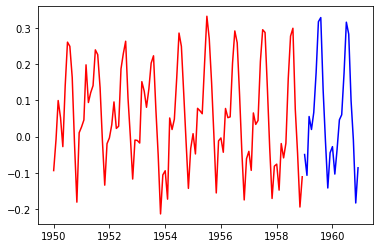

In [44]:
plt.plot(trd,c="red")
plt.plot(tsd,c="blue")

In [46]:
trd = B[B.index.year<=1958]
tsd = B[B.index.year>1958]

from statsmodels.tsa.ar_model import AR
model = AR(trd).fit()
pred = model.predict(start="1959-01-01",end="1960-12-01")
tsd['Forecasted_from_AR']=pred

C:\Users\Baccchi\anaconda3\envs\Machine_Learning_Class\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPREC

In [50]:
from sklearn.metrics import mean_squared_error
print("MSE = %.2f"%mean_squared_error(tsd.Pass,tsd.Forecasted_from_AR))

MSE = 0.00


In [52]:
tsd

,passengers,diff
year,,
1959-01-01,360,-0.049241
1959-02-01,342,-0.106598
1959-03-01,406,0.055385
1959-04-01,396,0.019679
1959-05-01,420,0.066365
1959-06-01,472,0.176286
1959-07-01,548,0.316430
1959-08-01,559,0.327838
1959-09-01,463,0.128057


In [53]:
trd

,passengers,diff
year,,
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,NaN
...,...,...
1958-08-01,505,0.298412
1958-09-01,404,0.075268
1958-10-01,359,-0.045657
